In [4]:
import finterstellar as fs

In [5]:
symbol = 'MSFT'
df = fs.get_price(symbol, start_date='2022-05-31', end_date='2025-05-31')

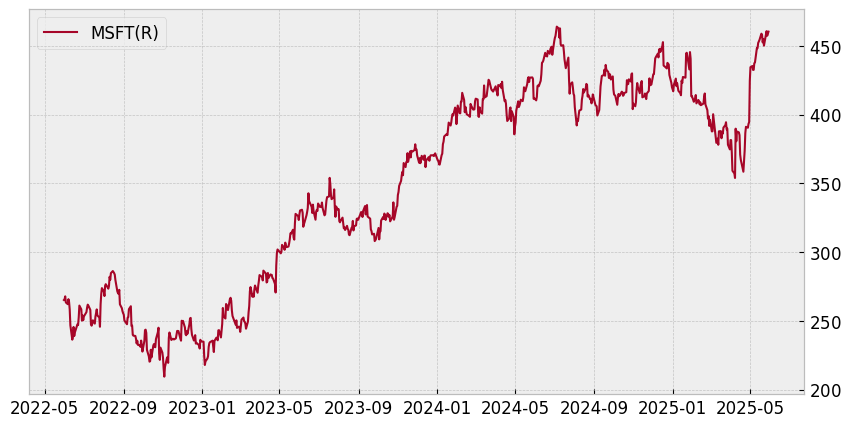

In [6]:
fs.draw_chart(df, right=symbol)

In [7]:
 fs.macd(df)
 df.tail()

,MSFT,ema_short,ema_long,macd,macd_signal,macd_oscillator
2025-05-23,450.18,446.96,430.44,16.52,16.74,-0.22
2025-05-27,460.69,449.07,432.68,16.39,16.67,-0.28
2025-05-28,457.36,450.35,434.51,15.84,16.51,-0.67
2025-05-29,458.68,451.63,436.30,15.33,16.27,-0.94
2025-05-30,460.36,452.97,438.08,14.89,15.99,-1.10


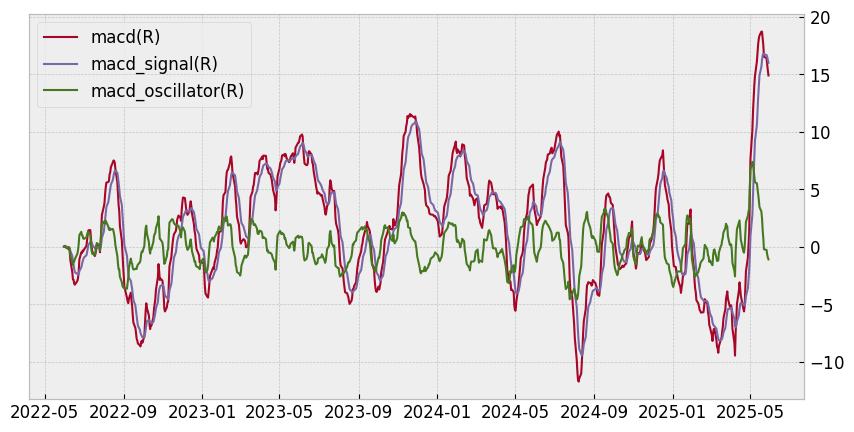

In [8]:
fs.draw_chart(df, right=['macd','macd_signal','macd_oscillator'])

In [10]:
fs.indicator_to_signal(df, factor='macd_oscillator', buy=0, sell=0)

2022-05-31    zero
2022-06-01    zero
2022-06-02     buy
2022-06-03    zero
2022-06-06    zero
              ... 
2025-05-23    zero
2025-05-27    zero
2025-05-28    zero
2025-05-29    zero
2025-05-30    zero
Name: trade, Length: 753, dtype: object

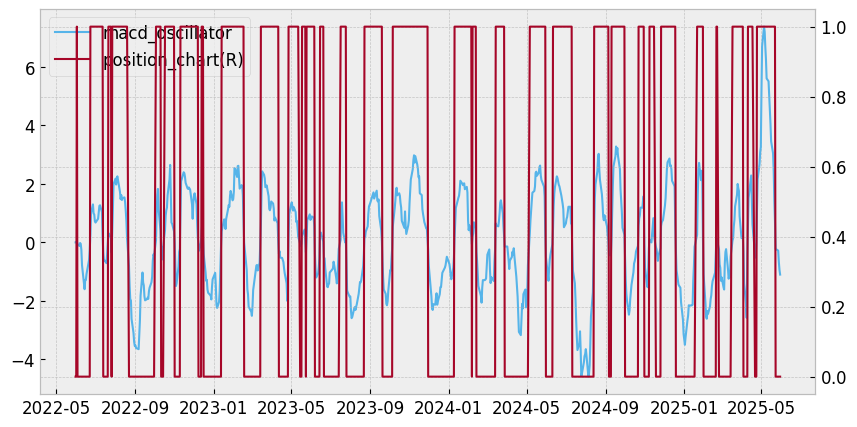

In [11]:
fs.position(df)
fs.draw_chart(df, right='position_chart', left='macd_oscillator')

CAGR: -0.47%
Accumulated return: -1.41%
Average return: 0.10%
Benchmark return : 73.63%
Number of trades: 32
Number of win: 12
Hit ratio: 37.50%
Investment period: 3.0yrs
Sharpe ratio: -0.11
MDD: -23.36%
Benchmark MDD: -26.84%


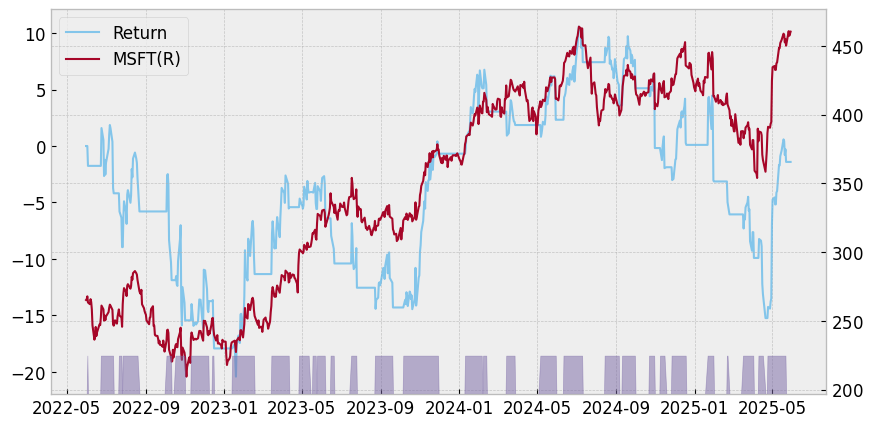

In [12]:
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.02)
fs.draw_trade_results(df)

CAGR: -0.47%
Accumulated return: -1.41%
Average return: 0.10%
Benchmark return : 73.63%
Number of trades: 32
Number of win: 12
Hit ratio: 37.50%
Investment period: 3.0yrs
Sharpe ratio: -0.11
MDD: -23.36%
Benchmark MDD: -26.84%


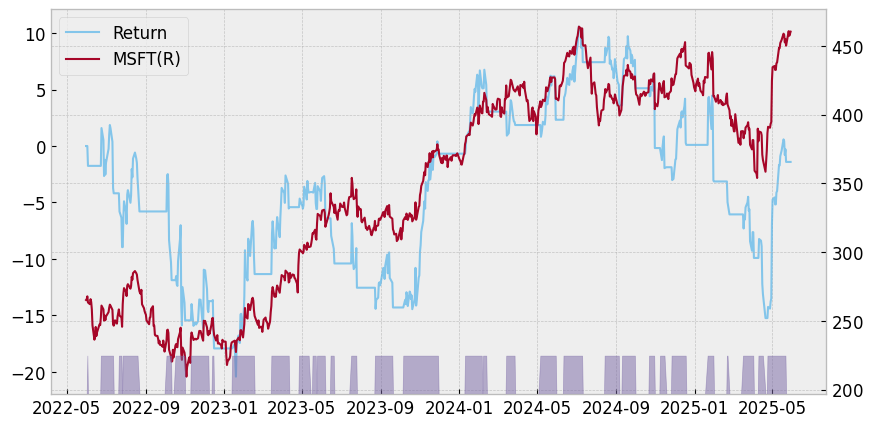

In [13]:
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.02)
fs.draw_trade_results(df)

In [21]:
def macd(df,  short= 12,  long=26, signal=9):
 symbol  =  df.columns[0]
 df ['ema_short']   = df [symbol].ewm(span=short).mean()
 df ['ema_long' ]   = df [symbol] .ewm(span=long).mean()
 df ['macd']        = (df['ema_short'] - df['ema_long']).round(2)
 df ['macd_signal']= df ['macd'].ewm(span= signal).mean().round(2)
 df ['macd—oscillator']  = (df['macd'] - df['macd_signal']).round(2)
 return df[[symbol,  'macd', 'macd_signal', 'macd_oscillator']]